In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from selective_classification import estimate_beta_by_definition

In [3]:
# Load cached data
if not os.path.exists('../data'):
    os.system('gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz')
    os.system('tar -xf ../data.tar.gz -C ../')
    os.system('rm ../data.tar.gz')

data = np.load('../data/imagenet/imagenet-resnet152.npz')
smx = data['smx']
labels = data['labels'].astype(int)
phats = smx.max(axis=1)
yhats = np.argmax(smx, axis=1)
errors = (labels != yhats)

# Setup
alpha = 0.1
n_bootstrap = 100
n_total = len(phats)
print(f"Total samples: {n_total}")

Total samples: 50000


In [4]:
# Estimate beta for different values of n
n_values = [50, 100, 200, 500, 1000]
betas = []

for n in n_values:
    idx = np.random.choice(n_total, size=n, replace=False)
    phats_sample = phats[idx]
    errors_sample = errors[idx]
    beta = estimate_beta_by_definition(phats_sample, errors_sample, alpha=alpha, n_bootstrap=n_bootstrap)
    betas.append(beta)
    print(f"n={n}: beta={beta}")

n=50: beta=0.021470588235294116
n=100: beta=0.012000000000000002
n=200: beta=0.005288557213930348
n=500: beta=0.002065868263473054
n=1000: beta=0.0011168831168831168


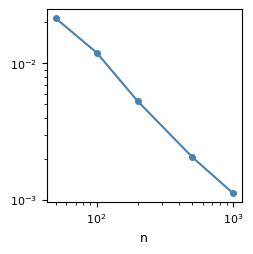

In [5]:
# Plot beta vs n
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(n_values, betas, 'o-', color='steelblue', markersize=4, linewidth=1.5)
ax.set_xlabel('n', fontsize=9)
ax.tick_params(axis='both', labelsize=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal', 'box')
os.makedirs('./plots', exist_ok=True)
plt.savefig('./plots/imagenet_beta_vs_n.pdf', dpi=300, bbox_inches='tight')
plt.show()